UDG - CUCEA - MCD - Desarrollo de Proyecto I  
Alumno: Fernando Arevalo

# Análisis exploratorio de datos (EDA)

### Primero Seleccionaremos las Acciones
Para este análisis exploratorio elegiremos 5 de las acciones más capitalizadas:

1. Apple Inc. (AAPL)
2. Microsoft Corporation (MSFT)
3. Amazon.com, Inc. (AMZN)
4. Alphabet Inc. (GOOGL)
5. Meta Platforms, Inc. (META) (anteriormente Facebook)

### Segundo descargaremos los datos,y los guardaremos correctamente estructurados

#### Paso 1: Descargar los Datos con yfinance

In [1]:
import yfinance as yf
import pandas as pd

# Lista de símbolos
symbols = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META']

# Descargar datos
data = yf.download(symbols, start='2020-01-01', end='2021-12-31')

# Verificar los datos descargados
print(data.head())


[*********************100%***********************]  5 of 5 completed

Price       Adj Close                                                \
Ticker           AAPL       AMZN      GOOGL        META        MSFT   
Date                                                                  
2020-01-02  72.796005  94.900497  68.264961  209.150269  153.630661   
2020-01-03  72.088310  93.748497  67.907845  208.043610  151.717697   
2020-01-06  72.662697  95.143997  69.717865  211.961807  152.109909   
2020-01-07  72.320976  95.343002  69.583206  212.420410  150.722977   
2020-01-08  73.484360  94.598503  70.078476  214.573944  153.123749   

Price           Close                                                ...  \
Ticker           AAPL       AMZN      GOOGL        META        MSFT  ...   
Date                                                                 ...   
2020-01-02  75.087502  94.900497  68.433998  209.779999  160.619995  ...   
2020-01-03  74.357498  93.748497  68.075996  208.669998  158.619995  ...   
2020-01-06  74.949997  95.143997  69.890503  212.60

#### Paso 2: Aplanar el Índice de las Columnas

In [2]:
data.columns = ['_'.join(col).strip() for col in data.columns.values]

#### Paso 3: Asignar nombre al índice y resetearlo

In [3]:
data.index.name = 'Date'  # Asigna el nombre 'Date' al índice
data = data.reset_index()

#### Paso 4: Reestructurar con melt

In [4]:
data_melted = pd.melt(data, id_vars=['Date'], var_name='Variable', value_name='Value')

In [5]:
# Paso 5: Filtrar las filas donde 'Variable' contiene '_'
data_filtered = data_melted[data_melted['Variable'].str.contains('_')]

In [6]:
# Paso 6: Separar 'Variable' en 'Attribute' y 'Ticker'
data_filtered[['Attribute', 'Ticker']] = data_filtered['Variable'].str.split('_', expand=True)

In [7]:
# Paso 7: Eliminar la columna 'Variable' y reordenar
data_filtered = data_filtered.drop('Variable', axis=1)
data_filtered = data_filtered[['Date', 'Ticker', 'Attribute', 'Value']]

In [8]:
# Paso 8: Verificar el resultado
print(data_filtered.head())

        Date Ticker  Attribute      Value
0 2020-01-02   AAPL  Adj Close  72.796005
1 2020-01-03   AAPL  Adj Close  72.088310
2 2020-01-06   AAPL  Adj Close  72.662697
3 2020-01-07   AAPL  Adj Close  72.320976
4 2020-01-08   AAPL  Adj Close  73.484360


In [9]:
# Paso 9: Guardar en CSV
data_filtered.to_csv('datos_acciones.csv', index=False)

### Tercer paso, Ahora que tenemos los datos correctamente estructurados y guardados, continuaremos con el Análisis Exploratorio de Datos (EDA)  
1. Descripción de los datos
2. Limpieza de datos
3. Valores faltantes (Missing values)
4. Visualización de datos
5. Referencias

### 1. Descripción de los Datos

##### Importar Librerías y Cargar los Datos  
Primero, debemos importar las librerías necesarias y cargar el archivo CSV que hemos generado.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar opciones de visualización
%matplotlib inline
sns.set(style="whitegrid")

# Cargar los datos desde el archivo CSV
data = pd.read_csv('datos_acciones.csv')

# Ver las primeras filas del DataFrame
print(data.head())

         Date Ticker  Attribute      Value
0  2020-01-02   AAPL  Adj Close  72.796005
1  2020-01-03   AAPL  Adj Close  72.088310
2  2020-01-06   AAPL  Adj Close  72.662697
3  2020-01-07   AAPL  Adj Close  72.320976
4  2020-01-08   AAPL  Adj Close  73.484360


##### Información General del DataFrame
Obtenemos información general sobre el DataFrame para entender su estructura.

In [11]:
# Dimensiones del DataFrame
print(f"El DataFrame tiene {data.shape[0]} filas y {data.shape[1]} columnas.")

# Información de las columnas
print(data.info())

El DataFrame tiene 15120 filas y 4 columnas.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15120 non-null  object 
 1   Ticker     15120 non-null  object 
 2   Attribute  15120 non-null  object 
 3   Value      15120 non-null  float64
dtypes: float64(1), object(3)
memory usage: 472.6+ KB
None


##### Estadísticas Descriptivas
Calculamos estadísticas básicas para comprender mejor los datos numéricos.

In [12]:
# Convertir la columna 'Date' a tipo datetime
data['Date'] = pd.to_datetime(data['Date'])

# Estadísticas descriptivas para la columna 'Value'
print(data['Value'].describe())

count    1.512000e+04
mean     9.845173e+06
std      3.054514e+07
min      5.044350e+01
25%      1.248212e+02
50%      1.722120e+02
75%      3.002125e+02
max      4.265100e+08
Name: Value, dtype: float64


##### Variables Únicas en 'Ticker' y 'Attribute'
Identificamos las diferentes acciones y atributos presentes en el conjunto de datos.

In [13]:
# Acciones (Tickers) disponibles
tickers = data['Ticker'].unique()
print(f"Acciones disponibles: {tickers}")

# Atributos disponibles
attributes = data['Attribute'].unique()
print(f"Atributos disponibles: {attributes}")

Acciones disponibles: ['AAPL' 'AMZN' 'GOOGL' 'META' 'MSFT']
Atributos disponibles: ['Adj Close' 'Close' 'High' 'Low' 'Open' 'Volume']


### 2. Limpieza de Datos

##### Verificar Tipos de Datos
Aseguramos que las columnas tengan los tipos de datos correctos.

In [14]:
# Ver tipos de datos
print(data.dtypes)

Date         datetime64[ns]
Ticker               object
Attribute            object
Value               float64
dtype: object


##### Eliminar Duplicados
Verificamos si hay filas duplicadas y las eliminamos.

In [15]:
# Número de duplicados
num_duplicates = data.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicates}")

# Eliminar duplicados si existen
if num_duplicates > 0:
    data = data.drop_duplicates()

Número de filas duplicadas: 0


### 3. Valores Faltantes (Missing Values)

##### Detección de Valores Faltantes
Comprobamos si hay valores faltantes en el DataFrame.

In [16]:
# Conteo de valores faltantes por columna
missing_values = data.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
Date         0
Ticker       0
Attribute    0
Value        0
dtype: int64


##### Análisis de Valores Faltantes
- Si hubiera valores faltantes en 'Value': Esto puede afectar nuestros análisis, por lo que necesitariamos decidir cómo manejarlos.
- Opciones:
  - Eliminar las filas con valores faltantes.
  - Imputar valores faltantes: Por ejemplo, utilizando el promedio o mediana.

En nuestro caso no tuvimos valores faltantes, así que continuamos con nuestro análisis

### 4. Visualización de Datos

##### Preparación para Visualizaciones
Para facilitar las visualizaciones, pivotaremos el DataFrame para tener las columnas de atributos.

In [17]:
# Pivotar el DataFrame
data_pivot = data.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='Value').reset_index()

# Ver las primeras filas
print(data_pivot.head())

Attribute       Date Ticker   Adj Close       Close        High         Low  \
0         2020-01-02   AAPL   72.796005   75.087502   75.150002   73.797501   
1         2020-01-02   AMZN   94.900497   94.900497   94.900497   93.207497   
2         2020-01-02  GOOGL   68.264961   68.433998   68.433998   67.324501   
3         2020-01-02   META  209.150269  209.779999  209.789993  206.270004   
4         2020-01-02   MSFT  153.630661  160.619995  160.729996  158.330002   

Attribute        Open       Volume  
0           74.059998  135480400.0  
1           93.750000   80580000.0  
2           67.420502   27278000.0  
3          206.750000   12077100.0  
4          158.779999   22622100.0  


##### Visualización del Precio de Cierre Ajustado ('Adj Close') para Cada Acción

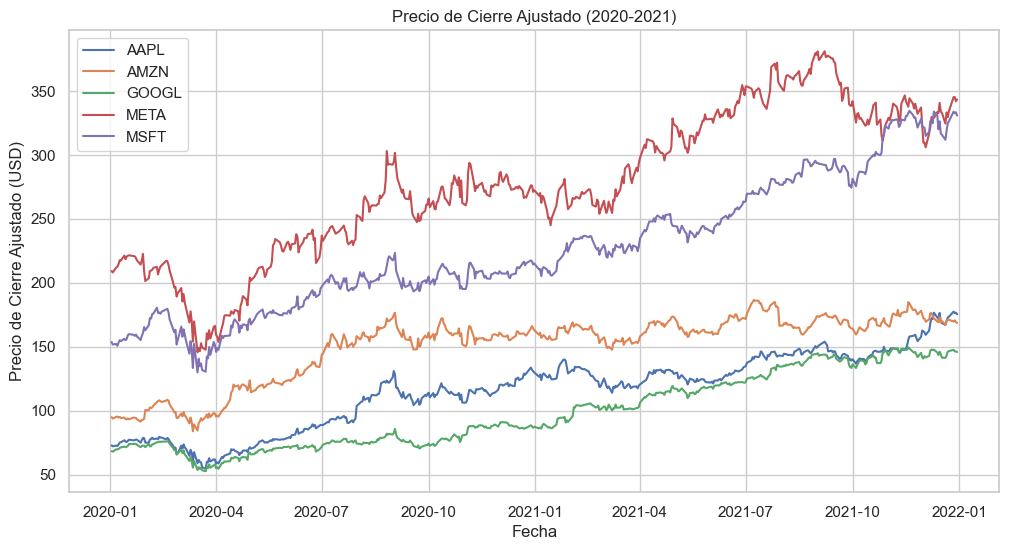

In [18]:
plt.figure(figsize=(12,6))

for ticker in tickers:
    subset = data_pivot[data_pivot['Ticker'] == ticker]
    plt.plot(subset['Date'], subset['Adj Close'], label=ticker)

plt.title('Precio de Cierre Ajustado (2020-2021)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado (USD)')
plt.legend()
plt.show()

##### Análisis de Volumen de Negociación

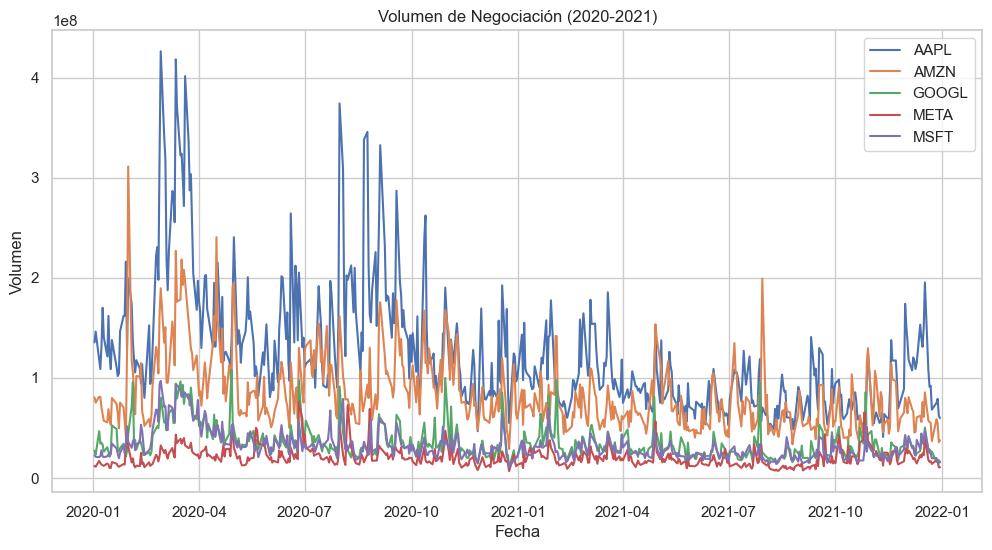

In [19]:
plt.figure(figsize=(12,6))

for ticker in tickers:
    subset = data_pivot[data_pivot['Ticker'] == ticker]
    plt.plot(subset['Date'], subset['Volume'], label=ticker)

plt.title('Volumen de Negociación (2020-2021)')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.legend()
plt.show()

##### Retornos Diarios
Calculamos y visualizamos los retornos diarios.

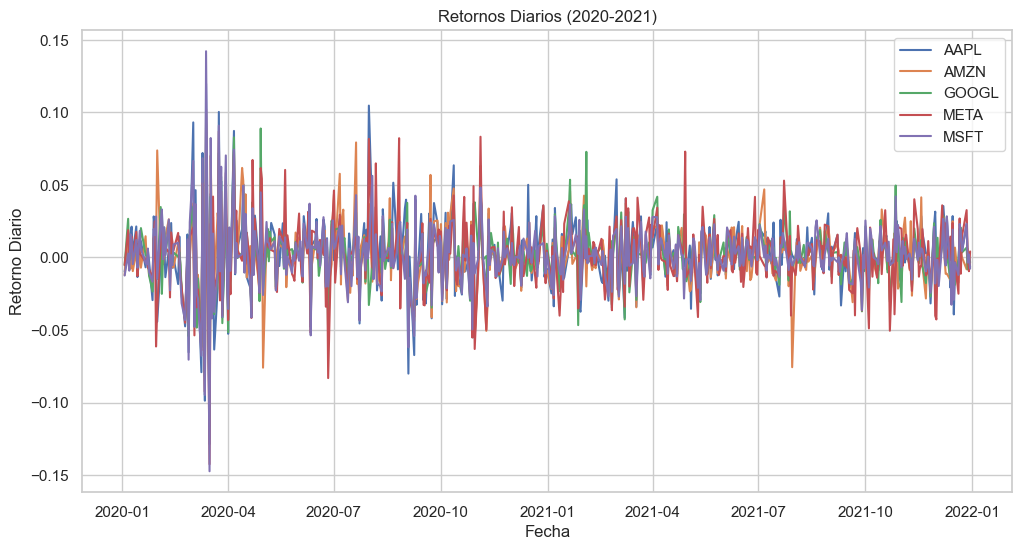

In [20]:
plt.figure(figsize=(12,6))

for ticker in tickers:
    subset = data_pivot[data_pivot['Ticker'] == ticker].sort_values('Date')
    subset['Daily Return'] = subset['Adj Close'].pct_change()
    plt.plot(subset['Date'], subset['Daily Return'], label=ticker)

plt.title('Retornos Diarios (2020-2021)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.legend()
plt.show()

#### Análisis de Correlación entre Acciones

##### Crear una Tabla Pivote con Precios de Cierre Ajustado

In [21]:
# Crear una tabla pivote
pivot_table = data_pivot.pivot(index='Date', columns='Ticker', values='Adj Close')

# Calcular la matriz de correlación
returns = pivot_table.pct_change()
correlation = returns.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation)

Matriz de correlación:
Ticker      AAPL      AMZN     GOOGL      META      MSFT
Ticker                                                  
AAPL    1.000000  0.670217  0.698124  0.697754  0.805957
AMZN    0.670217  1.000000  0.647919  0.632580  0.695673
GOOGL   0.698124  0.647919  1.000000  0.734922  0.820704
META    0.697754  0.632580  0.734922  1.000000  0.698811
MSFT    0.805957  0.695673  0.820704  0.698811  1.000000


##### Visualizar la Matriz de Correlación

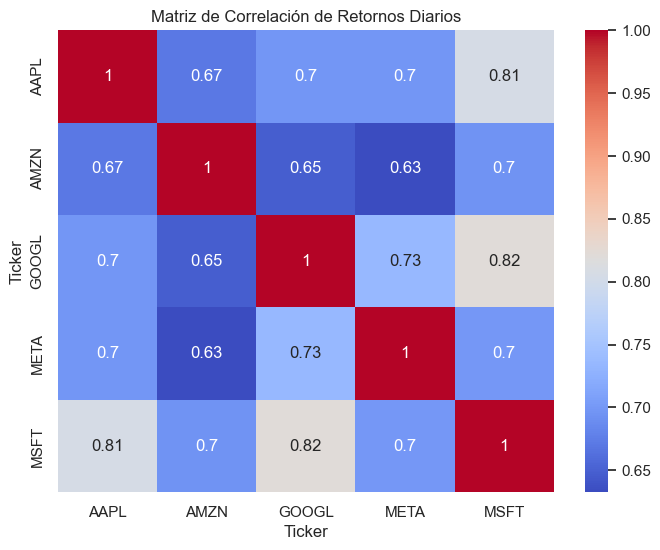

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Retornos Diarios')
plt.show()

##### Análisis de Correlación:
  
* Las acciones analizadas presentan altas correlaciones entre sí, lo que es común en empresas del mismo sector o en mercados alcistas generales.
* Esto sugiere que factores macroeconómicos y sentimentales podrían estar afectando a estas acciones de manera similar.

### Notas finales:  
Este EDA nos brinda una comprensión inicial de los datos históricos de las acciones más capitalizadas. Nos prepara para etapas posteriores del proyecto donde integraremos análisis más complejos para mejorar la toma de decisiones de inversión.

### Siguientes Pasos
* Análisis de Eventos Específicos:
  * Investigar fechas con movimientos significativos para entender las causas detrás de ellos.
* Incorporar Análisis de Sentimientos:
  * En futuros análisis, combinar los datos históricos con el análisis de sentimientos podría aportar mayor profundidad.
* Modelado Predictivo:
  * Utilizar los datos procesados para desarrollar modelos que puedan predecir movimientos futuros.

### 5. Referencias

* Librerías Utilizadas:

  * Pandas: https://pandas.pydata.org/
  * NumPy: https://numpy.org/
  * Matplotlib: https://matplotlib.org/
  * Seaborn: https://seaborn.pydata.org/
  * yfinance: https://pypi.org/project/yfinance/
* Fuentes de Datos:
  * Yahoo Finance a través de la librería yfinance.
* Documentación y Recursos Adicionales:
  * Análisis Exploratorio de Datos: https://www.kaggle.com/learn/data-cleaning
  * Visualización de Datos con Matplotlib y Seaborn: https://realpython.com/python-matplotlib-guide/
  * Análisis exploratorio de datos (EDA): https://github.com/vcuspinera/UDG_MCD_Project_Dev_I/blob/main/actividades/13_EDA.ipynb

## Parte 2 - Web Scraper de Noticias Tecnológicas Detallado



In [ ]:
pip install requests beautifulsoup4 pandas

In [32]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta
import time

class NewsScraperTech:
    def __init__(self):
        self.headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        
    def get_finviz_news(self, ticker):
        """Obtiene noticias de Finviz para un ticker específico"""
        url = f'https://finviz.com/quote.ashx?t={ticker}'
        news = []
        
        try:
            response = requests.get(url, headers=self.headers)
            soup = BeautifulSoup(response.text, 'html.parser')
            news_table = soup.find('table', {'class': 'news-table'})
            
            if news_table:
                for row in news_table.findAll('tr'):
                    cols = row.findAll('td')
                    if len(cols) == 2:
                        date = cols[0].text.strip()
                        title = cols[1].text.strip()
                        link = cols[1].find('a')['href']
                        news.append({
                            'ticker': ticker,
                            'date': date,
                            'title': title,
                            'source': 'Finviz',
                            'link': link
                        })
            
        except Exception as e:
            print(f"Error obteniendo noticias de {ticker}: {str(e)}")
            
        return news

    def get_marketwatch_news(self, ticker):
        """Obtiene noticias de MarketWatch para un ticker específico"""
        url = f'https://www.marketwatch.com/investing/stock/{ticker}'
        news = []
        
        try:
            response = requests.get(url, headers=self.headers)
            soup = BeautifulSoup(response.text, 'html.parser')
            news_elements = soup.find_all('div', {'class': 'article__content'})
            
            for element in news_elements:
                title_element = element.find('a', {'class': 'link'})
                if title_element:
                    title = title_element.text.strip()
                    link = title_element['href']
                    date = element.find('span', {'class': 'article__timestamp'})
                    date = date.text if date else 'N/A'
                    
                    news.append({
                        'ticker': ticker,
                        'date': date,
                        'title': title,
                        'source': 'MarketWatch',
                        'link': link
                    })
                    
        except Exception as e:
            print(f"Error obteniendo noticias de MarketWatch para {ticker}: {str(e)}")
            
        return news

    def scrape_all_tickers(self, tickers):
        """Obtiene noticias para una lista de tickers de todas las fuentes"""
        all_news = []
        
        for ticker in tickers:
            # Obtener noticias de cada fuente
            finviz_news = self.get_finviz_news(ticker)
            marketwatch_news = self.get_marketwatch_news(ticker)
            
            # Combinar resultados
            all_news.extend(finviz_news)
            all_news.extend(marketwatch_news)
            
            # Esperar entre requests para evitar bloqueos
            time.sleep(2)
        
        # Convertir a DataFrame
        df_news = pd.DataFrame(all_news)
        
        # Limpiar y formatear fechas
        df_news['date'] = pd.to_datetime(df_news['date'], errors='coerce')
        
        return df_news

    def save_news(self, df_news, filename='tech_news.csv'):
        """Guarda las noticias en un archivo CSV"""
        df_news.to_csv(filename, index=False)
        print(f"Noticias guardadas en {filename}")

# Ejemplo de uso
if __name__ == "__main__":
    # Lista de tickers a analizar
    tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META']
    
    # Crear instancia del scraper
    scraper = NewsScraperTech()
    
    # Obtener noticias
    news_df = scraper.scrape_all_tickers(tickers)
    
    # Guardar resultados
    scraper.save_news(news_df)
    
    # Mostrar resumen
    print("\nResumen de noticias recopiladas:")
    print(news_df.groupby(['ticker', 'source']).size())

Noticias guardadas en tech_news.csv

Resumen de noticias recopiladas:
ticker  source
AAPL    Finviz    100
AMZN    Finviz    100
GOOGL   Finviz    100
META    Finviz    100
MSFT    Finviz    100
dtype: int64


C:\Users\carmen.herrera\AppData\Local\Temp\ipykernel_32012\2566932233.py:94: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_news['date'] = pd.to_datetime(df_news['date'], errors='coerce')
